In [1]:
pip install numpy pandas matplotlib tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [175]:
#Fetch Images count from Fodlers
count = 0 
dirs = os.listdir('/Users/instabug/Desktop/sharks')
for dir in dirs:
    files = list(os.listdir('/Users/instabug/Desktop/sharks'))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

hammerhead Folder has 15 Images
bull Folder has 15 Images
nurse Folder has 15 Images
.DS_Store Folder has 15 Images
mako Folder has 15 Images
blue Folder has 15 Images
lemon Folder has 15 Images
basking Folder has 15 Images
tiger Folder has 15 Images
whale Folder has 15 Images
whitetip Folder has 15 Images
thresher Folder has 15 Images
sand tiger Folder has 15 Images
white Folder has 15 Images
blacktip Folder has 15 Images
Images Folder has 225 Images


In [176]:
#Load Images into Arrays as Dataset
base_dir = '/Users/instabug/Desktop/sharks'
img_size = 180
batch = 32

In [191]:
import os
import imghdr

def validate_images(dataset_dir):
    print("Checking for unsupported or invalid files...")
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            file_path = os.path.join(root, file)
            file_type = imghdr.what(file_path)
            if file_type not in ['jpeg', 'png', 'gif', 'bmp']:
                print(f"Unsupported or invalid file detected: {file_path} (type: {file_type})")

# Replace 'dataset_dir' with the path to your dataset
dataset_dir = '/Users/instabug/Desktop/sharks'
validate_images(dataset_dir)


Checking for unsupported or invalid files...
Unsupported or invalid file detected: /Users/instabug/Desktop/sharks/.DS_Store (type: None)
Unsupported or invalid file detected: /Users/instabug/Desktop/sharks/hammerhead/.DS_Store (type: None)
Unsupported or invalid file detected: /Users/instabug/Desktop/sharks/hammerhead/00000089.jpg (type: None)
Unsupported or invalid file detected: /Users/instabug/Desktop/sharks/hammerhead/00000003.jpeg (type: None)
Unsupported or invalid file detected: /Users/instabug/Desktop/sharks/hammerhead/00000036.jpg (type: None)
Unsupported or invalid file detected: /Users/instabug/Desktop/sharks/bull/.DS_Store (type: None)
Unsupported or invalid file detected: /Users/instabug/Desktop/sharks/bull/00000000.jpg (type: None)
Unsupported or invalid file detected: /Users/instabug/Desktop/sharks/bull/00000050.jpg (type: None)
Unsupported or invalid file detected: /Users/instabug/Desktop/sharks/bull/00000078.jpg (type: None)
Unsupported or invalid file detected: /Users

In [192]:
def filter_valid_images(file_path):
    try:
        image = tf.io.read_file(file_path)
        tf.image.decode_image(image)
        return True
    except:
        return False

dataset = tf.data.Dataset.list_files("/Users/instabug/Desktop/sharks")
dataset = dataset.filter(filter_valid_images)


In [193]:
from PIL import Image
import os

def fix_png_images(dataset_dir):
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(".png"):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        img.save(file_path)
                except Exception as e:
                    print(f"Failed to fix {file_path}: {e}")

# Replace with your dataset directory
dataset_dir = "/Users/instabug/Desktop/sharks"
fix_png_images(dataset_dir)

In [196]:
def remove_corrupted_files(dataset_dir):
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                image = tf.io.read_file(file_path)
                tf.image.decode_image(image)
            except:
                print(f"Removing corrupted file: {file_path}")
                os.remove(file_path)

dataset_dir = "/Users/instabug/Desktop/sharks"
remove_corrupted_files(dataset_dir)


Removing corrupted file: /Users/instabug/Desktop/sharks/.DS_Store
Removing corrupted file: /Users/instabug/Desktop/sharks/hammerhead/.DS_Store


2024-12-27 17:18:28.093835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


Removing corrupted file: /Users/instabug/Desktop/sharks/bull/.DS_Store
Removing corrupted file: /Users/instabug/Desktop/sharks/bull/00000143.jpg
Removing corrupted file: /Users/instabug/Desktop/sharks/bull/00000021.jpg
Removing corrupted file: /Users/instabug/Desktop/sharks/mako/.DS_Store
Removing corrupted file: /Users/instabug/Desktop/sharks/mako/00000058.jpg


2024-12-27 17:18:31.628952: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


Removing corrupted file: /Users/instabug/Desktop/sharks/blue/.DS_Store
Removing corrupted file: /Users/instabug/Desktop/sharks/blue/00000047.jpg
Removing corrupted file: /Users/instabug/Desktop/sharks/blue/00000065.jpeg
Removing corrupted file: /Users/instabug/Desktop/sharks/blue/00000081.jpg
Removing corrupted file: /Users/instabug/Desktop/sharks/lemon/.DS_Store
Removing corrupted file: /Users/instabug/Desktop/sharks/lemon/00000117.jpg
Removing corrupted file: /Users/instabug/Desktop/sharks/lemon/00000053.jpg
Removing corrupted file: /Users/instabug/Desktop/sharks/lemon/00000130.jpg
Removing corrupted file: /Users/instabug/Desktop/sharks/basking/00000039.jpg
Removing corrupted file: /Users/instabug/Desktop/sharks/basking/.DS_Store
Removing corrupted file: /Users/instabug/Desktop/sharks/basking/00000112.jpg
Removing corrupted file: /Users/instabug/Desktop/sharks/tiger/.DS_Store
Removing corrupted file: /Users/instabug/Desktop/sharks/whale/.DS_Store
Removing corrupted file: /Users/insta

2024-12-27 17:18:42.695769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


Removing corrupted file: /Users/instabug/Desktop/sharks/white/.DS_Store
Removing corrupted file: /Users/instabug/Desktop/sharks/blacktip/.DS_Store


In [198]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 1531 files belonging to 14 classes.
Using 1225 files for training.
Found 1531 files belonging to 14 classes.
Using 306 files for validation.


In [199]:
shark_species = train_ds.class_names
shark_species

['basking',
 'blacktip',
 'blue',
 'bull',
 'hammerhead',
 'lemon',
 'mako',
 'nurse',
 'sand tiger',
 'thresher',
 'tiger',
 'whale',
 'white',
 'whitetip']

In [200]:
shark_species = val_ds.class_names
shark_species

['basking',
 'blacktip',
 'blue',
 'bull',
 'hammerhead',
 'lemon',
 'mako',
 'nurse',
 'sand tiger',
 'thresher',
 'tiger',
 'whale',
 'white',
 'whitetip']

In [201]:
import matplotlib.pyplot as plt

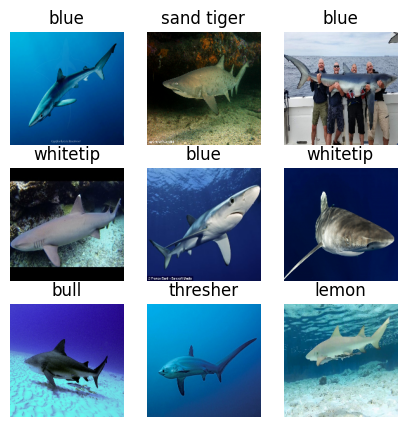

In [202]:
i = 0
plt.figure(figsize=(5,5))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(shark_species[labels[i]])
        plt.axis('off')

In [203]:
AUTOTUNE = tf.data.AUTOTUNE

In [204]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [205]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [206]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/Users/instabug/Library/Python/3.9/lib/python/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2024-12-27 17:19:15.497828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-12-27 17:19:18.343663: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


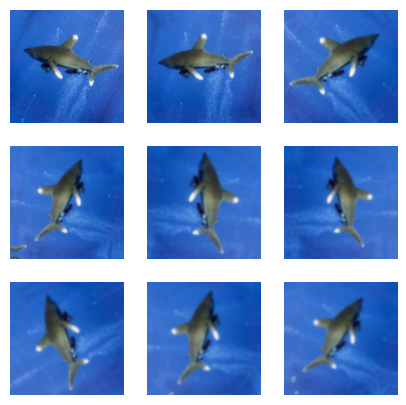

In [207]:
i = 0
plt.figure(figsize=(5,5))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')


In [214]:
#Model Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(14)
])

In [215]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [216]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,446 (15.22 MB)

 Trainable params: 3,990,446 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [218]:
history = model.fit(train_ds, epochs=30, validation_data=val_ds)


Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.5766 - loss: 1.3243 - val_accuracy: 0.4118 - val_loss: 2.0987
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - accuracy: 0.6150 - loss: 1.2183 - val_accuracy: 0.3824 - val_loss: 2.2720
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - accuracy: 0.5888 - loss: 1.2212 - val_accuracy: 0.3693 - val_loss: 2.1353
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.6129 - loss: 1.1851 - val_accuracy: 0.4052 - val_loss: 2.1674
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.6544 - loss: 1.0400 - val_accuracy: 0.4020 - val_loss: 2.3131
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 218ms/step - accuracy: 0.6743 - loss: 0.9960 - val_accuracy: 0.3922 - val_loss: 2.2290
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.6565 - loss: 1.0124 - val_accuracy: 0.4020 - val_loss: 2.2352
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.7078 - loss: 0.9200 - val_accuracy: 0.

In [219]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + shark_species[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [237]:
classify_images('/Users/instabug/Desktop/sharks/white/00000090.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


'The Image belongs to white with a score of 84.23878'

In [238]:
model.save('Shark_species_model.keras')
